# Datafy Analysis
This notebook is an analysis of my Spotify listening history. The data contains numeric metrics generated by Spotify which measure the songs' danceability, mood, liveness, etc. The data also contains the songs' title, artist, and date related information.

First I will import all of the necessary modules and generate the table to begin analysis.


In [195]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model, neighbors
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
import math


%matplotlib inline

data_frame = pd.read_csv("/Users/joshuareid/Documents/GitHub/Datafy/jupyter.csv")
data_frame = data_frame.drop("Unnamed: 0", axis="columns")



#Normalize instrumentalness
mean_instr = data_frame.energy.dropna().mean()
max_instr = data_frame.energy.dropna().max()
min_instr = data_frame.energy.dropna().min()
data_frame['energy'] = data_frame['energy'].apply(lambda x: (x - mean_instr ) / (max_instr -min_instr ))
data_frame['energy'] = data_frame['energy'].apply(lambda x: math.sqrt(x**2))

#Normalize valence
mean_val = data_frame.valence.dropna().mean()
max_val = data_frame.valence.dropna().max()
min_val = data_frame.valence.dropna().min()
data_frame['valence'] = data_frame['valence'].apply(lambda x: (x - mean_val ) / (max_val -min_val ))
data_frame['valence'] = data_frame['valence'].apply(lambda x: math.sqrt(x**2))

data_frame.head()





,Unnamed: 0.1,Artist,Album,Track,Year,Month,Day,Hour,Weekday,Temperature,...,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,12328,Drake,More Life,Passionfruit,2020.0,1.0,29.0,19.0,Wednesday,38.0,...,0.014723,0.004354,0.183079,-7.461956,0.214186,118.982724,0.035242,61.911708,1,1
1,35992,Hippo Campus,South - Single,South,2019.0,1.0,21.0,15.0,Monday,34.0,...,0.086388,0.017548,0.165243,-5.949571,0.044200,115.553000,0.045461,62.571429,9,1
2,35989,Hippo Campus,Landmark,Way It Goes,2019.0,1.0,21.0,15.0,Monday,34.0,...,0.086388,0.017548,0.165243,-5.949571,0.044200,115.553000,0.045461,62.571429,9,1
3,35986,Hippo Campus,Bashful Creatures,Souls,2019.0,1.0,21.0,15.0,Monday,34.0,...,0.086388,0.017548,0.165243,-5.949571,0.044200,115.553000,0.045461,62.571429,9,1
4,35984,Hippo Campus,SOUTH,Violet,2019.0,1.0,21.0,15.0,Monday,34.0,...,0.086388,0.017548,0.165243,-5.949571,0.044200,115.553000,0.045461,62.571429,9,1


In [ ]:
First I am going to analyze 

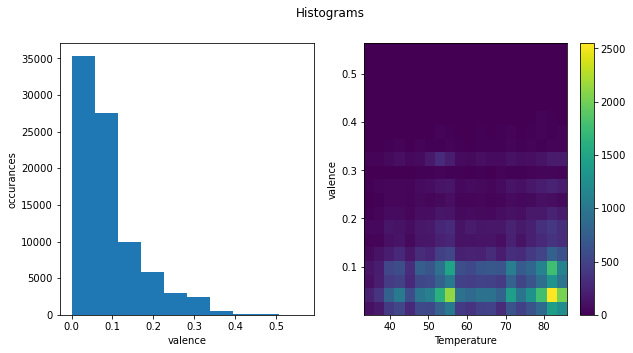

In [196]:
x = "Temperature"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")

h = ax2.hist2d(data_frame[x], data_frame[y], bins=20)
ax1.hist(data_frame["valence"])


ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("valence")
ax1.set_ylabel("occurances")

plt.colorbar(h[3], ax=ax2)

plt.show()

First I want to find a correlation between valence (the mood) and energy (intensity)

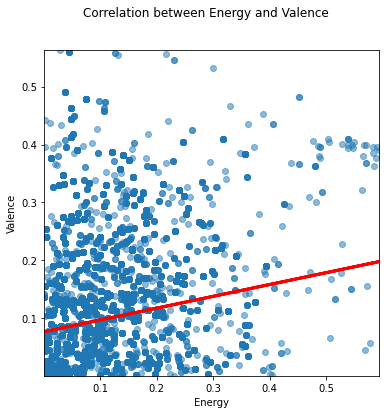

In [218]:
x = data_frame["energy"].values
y = data_frame["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between Energy and Valence")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.margins(x=0, y=0) 

plt.xlabel("Energy")
plt.ylabel("Valence")


plt.show()

This graph shows the best fit line of valence and energy. It can be concluded from this graph that I prefer songs that have valence and energy values along the regression line.